In [1]:
import os
import imageio

from sklearn.cluster import KMeans
from clustering import make_color_mean_map, kmeans, assign_labels
from colors import get_unique_colors, replace_colors, round_colors
from IPython.display import Image

In [2]:
IMAGES_DIR_IN = "img_in"
IMAGES_DIR_OUT = "img_out"
# SOURCE_IMAGE_FILE_NAME = "road.jpg"
SOURCE_IMAGE_FILE_NAME = "apples.jpg"

In [3]:
source_img_file_path = os.path.join(IMAGES_DIR_IN, SOURCE_IMAGE_FILE_NAME)

In [4]:
img_in = imageio.imread(source_img_file_path).astype(float)

In [5]:
unique_colors = list(get_unique_colors(img_in))
print("unique colors:", len(unique_colors))

unique colors: 15903


In [6]:
K = 64

In [7]:
# centers = kmeans(unique_colors, K, log=True)  # manual implementation
centers = KMeans(n_clusters=K, random_state=0).fit(unique_colors).cluster_centers_  # scikit-learn

In [8]:
labels = assign_labels(unique_colors, centers)
rounded_labels = round_colors(labels)
color_mean_map = make_color_mean_map(unique_colors, rounded_labels)

In [9]:
img_out = replace_colors(img_in, color_mean_map)

In [10]:
result_img_file_name = "road_out_{}.png".format(K)
result_img_file_path = os.path.join(IMAGES_DIR_OUT, result_img_file_name)

In [11]:
imageio.imwrite(result_img_file_path, img_out)

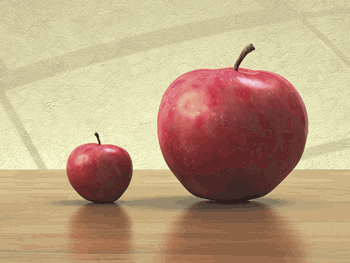

In [12]:
Image(filename=result_img_file_path) 